# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
data=pd.read_csv(r"C:\Users\utkarsh.sharma\Desktop\ml_az_github_push\dsets\50_Startups.csv")

In [3]:
display(data)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.shape

(50, 5)

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

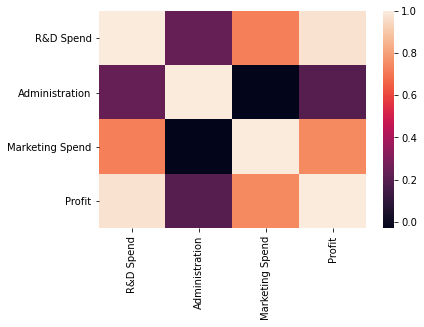

In [8]:
sns.heatmap(data.corr())

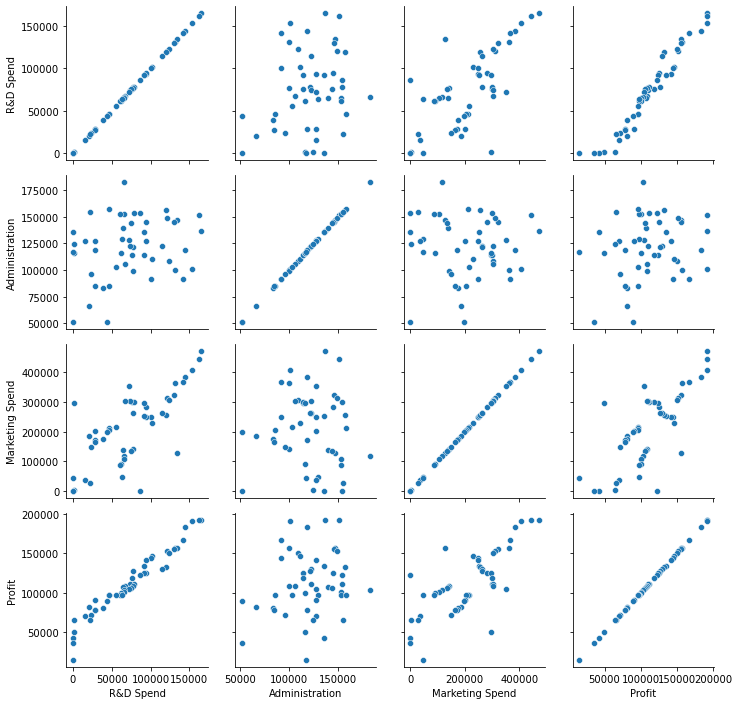

In [9]:
g=sns.PairGrid(data)
g.map(sns.scatterplot)

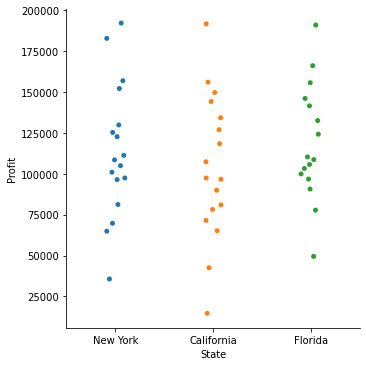

In [10]:
#Profits of the 50 companies in their respective state

sns.catplot(x=data['State'],y=data['Profit'],data=data)

In [11]:
#Splitting the target(dependent) variable from the independent variables(features)

X=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(X.shape)
print(y.shape)

(50, 4)
(50,)


## Encoding categorical data

In [12]:
#previously I used to use get_dummies method of pandas

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['State'])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 6)
(10, 6)
(40,)
(10,)


## Training the Multiple Linear Regression model on the Training set

In [14]:
#Looking at the high correlation between the profit and R&D spending,using single independent variable
#Simple linear regression
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
lr=LinearRegression()
lr.fit(X_train[:,3].reshape(40,1),y_train)
y_pred=lr.predict(X_test[:,3].reshape(10,1))
print(r2_score(y_test,y_pred))

0.9464587607787219


In [15]:
#Linear regression with two independent variables R&d and Marketing spend

X_2_training=pd.DataFrame(X_train,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])
X_2_testing=pd.DataFrame(X_test,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])

X_2_training.drop(['California','Florida','New York','Administration'],axis=1,inplace=True)
X_2_testing.drop(['California','Florida','New York','Administration'],axis=1,inplace=True)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
lr=LinearRegression()
lr.fit(X_2_training,y_train)
y_pred=lr.predict(X_2_testing)
print(r2_score(y_test,y_pred))

0.9474386447268489


In [16]:
#Possible interaction effect between R&D and marketing spend
#Creating an interaction term(R&DxMarketing)

from sklearn.preprocessing import PolynomialFeatures
inter=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

X_inter_tra=pd.DataFrame(X_train,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])
X_inter_tst=pd.DataFrame(X_test,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])

X_inter_tra.drop(['California','Florida','New York','Administration'],axis=1,inplace=True)
X_inter_tst.drop(['California','Florida','New York','Administration'],axis=1,inplace=True)

#For training
X_inter_training = pd.DataFrame(inter.fit_transform(X_inter_tra),columns=inter.get_feature_names(['R&D Spend','Marketing Spend']))

#For testing
X_inter_testing=pd.DataFrame(inter.fit_transform(X_inter_tst),columns=inter.get_feature_names(['R&D Spend','Marketing Spend']))

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_inter_training,y_train)
print(lr.intercept_)
print(lr.coef_)

y_pred=lr.predict(X_inter_testing)
print(r2_score(y_test,y_pred))


45144.399629407926
[ 8.10332518e-01  3.97171633e-02 -9.65792994e-08]
0.946891604644818


In [17]:
#Multiple linear regression(with dummy variable fallacy)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(X_test)
print(r2_score(y_test,y_pred))

42467.52924854249
[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
0.9347068473282303


In [18]:
#Multiple linear regression(without dummy variable fallacy)

X_train_wdtr=pd.DataFrame(X_train,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])
X_train_wdtr.drop(['California'],axis=1,inplace=True)
X_test_wdts=pd.DataFrame(X_test,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])
X_test_wdts.drop(['California'],axis=1,inplace=True)
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train_wdtr,y_train)
print(lr.intercept_)
print(lr.coef_)
y_pred=lr.predict(X_test_wdts)
print(r2_score(y_test,y_pred))

42554.16761772438
[-9.59284160e+02  6.99369053e+02  7.73467193e-01  3.28845975e-02
  3.66100259e-02]
0.9347068473282446


In [45]:
#Might have to do this again with AIC,BIC
#Rather than zeroing down variables using the correlation matrix, lets use best subset, forward stepwise and backward selection algos to choose the best features for the model
#Best subset selection
from tqdm import tnrange, tqdm_notebook
import itertools
from sklearn.linear_model import LinearRegression 
def fit_linear(X_train_sub,y_train):
    #for every k iteration
    k_model=LinearRegression()
    k_model.fit(X_train_sub,y_train)
    r2=k_model.score(X_train_sub,y_train)
    return r2

X_train_sub=pd.DataFrame(X_train,columns=['California','Florida','New York','R&D Spend','Administration','Marketing Spend'])
X_train_sub.drop('California',axis=1,inplace=True)
#k would be form 0 to 4 for the 5 variables
k=5
R_squared_list, feature_list = [],[]
numb_features = []
Adjusted_R_squared_list=[]

#Looping over k = 1 to k = 5 features in X_train
for k in tnrange(1,len(X_train_sub.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 5 choose k
    for combo in itertools.combinations(X_train_sub.columns,k):
        tmp_result = fit_linear(X_train_sub[list(combo)],y_train)                    
        R_squared_list.append(tmp_result)
        Adjusted_R_squared_list.append(1 - ( 1-tmp_result) * ( len(y_train) - 1 ) / ( len(y_train) - X_train_sub.shape[1] - 1 ))
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features, 'R_squared':R_squared_list,'Adjusted_R_squared':Adjusted_R_squared_list,'features':feature_list})
print(df)

Loop...:   0%|          | 0/5 [00:00<?, ?it/s]

    numb_features  R_squared  Adjusted_R_squared  \
0               1   0.000252           -0.146770   
1               1   0.023317           -0.120313   
2               1   0.944959            0.936865   
3               1   0.110609           -0.020184   
4               1   0.563603            0.499427   
5               2   0.031228           -0.111239   
6               2   0.944977            0.936886   
7               2   0.110609           -0.020184   
8               2   0.575097            0.512612   
9               2   0.944959            0.936865   
10              2   0.135554            0.008430   
11              2   0.583710            0.522491   
12              2   0.944960            0.936866   
13              2   0.949665            0.942263   
14              2   0.637049            0.583674   
15              3   0.944981            0.936890   
16              3   0.141038            0.014720   
17              3   0.586309            0.525473   
18          

In [ ]:
#Forward stepwise selection
